## 0. 라이브러리 설정

In [1]:
from tqdm import tqdm
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.options.display.float_format="{:.5f}".format
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

## 1. 데이터 불러오기

In [2]:
data = pd.read_csv('data/prf_dataset.csv')

In [3]:
data.head(1)

,공연일자,공연시작시간,선예매여부,예매시작일,장르,휴게시간,공연명,내한여부,러닝타임,가격종류,R석,A석,요일,결제내역수,티켓판매량,전체좌석,일반예매율,멤버십합계,가중예매율,멤버십유입률
0,2018-11-25,1700,1,20181029.00000,클래식,15,김대진 피아노 독주회,0,1시간 50분,3,50000.00000,20000.00000,6,1818,1537,2505.00000,0.61357,258,0.00412,0.00671


## 2. 데이터 전처리

In [4]:
def make_month(data):
    # 데이터프레임에서 '공연일자' 열을 datetime 형식으로 변환
    result = data.copy()
    result['공연일자'] = pd.to_datetime(result['공연일자'])

    # '월' 열 생성
    result['월'] = result['공연일자'].dt.month
    
    return result

In [5]:
# '러닝타임' column에서 시간과 분을 추출하여 분 단위로 변환
def convert_to_minutes(time_str):
    # '시간'과 '분'을 기준으로 문자열을 분리
    parts = time_str.split()
    
    total_minutes = 0  # 총 분 초기화
    
    for part in parts:
        if '시간' in part:
            # '시간'을 포함한 부분에서 숫자를 추출하여 분 단위로 변환
            hours = int(part.replace('시간', '')) * 60
            total_minutes += hours
        elif '분' in part:
            # '분'을 포함한 부분에서 숫자를 추출하여 분 단위로 변환
            minutes = int(part.replace('분', ''))
            total_minutes += minutes
    
    return total_minutes

# '러닝타임' column을 분 단위로 변환하여 새로운 column에 저장
data['러닝타임'] = data['러닝타임'].apply(convert_to_minutes)

In [6]:
data = make_month(data)

In [7]:
data = data.fillna(0)
data['가격종류'] = data['가격종류'].replace(0, 1)
data['요일'] = data['요일'].replace(0, '월요일')
data['요일'] = data['요일'].replace(1, '화요일')
data['요일'] = data['요일'].replace(2, '수요일')
data['요일'] = data['요일'].replace(3, '목요일')
data['요일'] = data['요일'].replace(4, '금요일')
data['요일'] = data['요일'].replace(5, '토요일')
data['요일'] = data['요일'].replace(6, '일요일')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   공연일자    516 non-null    datetime64[ns]
 1   공연시작시간  516 non-null    int64         
 2   선예매여부   516 non-null    int64         
 3   예매시작일   516 non-null    float64       
 4   장르      516 non-null    object        
 5   휴게시간    516 non-null    int64         
 6   공연명     516 non-null    object        
 7   내한여부    516 non-null    int64         
 8   러닝타임    516 non-null    int64         
 9   가격종류    516 non-null    int64         
 10  R석      516 non-null    float64       
 11  A석      516 non-null    float64       
 12  요일      516 non-null    object        
 13  결제내역수   516 non-null    int64         
 14  티켓판매량   516 non-null    int64         
 15  전체좌석    516 non-null    float64       
 16  일반예매율   516 non-null    float64       
 17  멤버십합계   516 non-null    int64         
 18  가중예매율   51

In [9]:
data.head(1)

,공연일자,공연시작시간,선예매여부,예매시작일,장르,휴게시간,공연명,내한여부,러닝타임,가격종류,R석,A석,요일,결제내역수,티켓판매량,전체좌석,일반예매율,멤버십합계,가중예매율,멤버십유입률,월
0,2018-11-25,1700,1,20181029.00000,클래식,15,김대진 피아노 독주회,0,110,3,50000.00000,20000.00000,일요일,1818,1537,2505.00000,0.61357,258,0.00412,0.00671,11


In [10]:
data_temp = data[['공연시작시간', '선예매여부', '장르', '내한여부', '러닝타임', '요일', '일반예매율', '멤버십유입률', '월']]

In [11]:
data_temp = pd.get_dummies(data_temp, columns=['장르', '요일', '월'])

In [12]:
data_temp.head()

,공연시작시간,선예매여부,내한여부,러닝타임,일반예매율,멤버십유입률,장르_교향곡,장르_기타,장르_독주,장르_복합장르,장르_성악,장르_실내악,장르_오페라,장르_재즈,장르_콘서트,장르_크로스오버,장르_클래식,장르_합창,요일_금요일,요일_목요일,요일_수요일,요일_일요일,요일_토요일,요일_화요일,월_1,월_2,월_3,월_4,월_5,월_6,월_7,월_8,월_9,월_10,월_11,월_12
0,1700,1,0,110,0.61357,0.00671,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1700,0,0,140,0.86427,0.00817,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2000,0,1,120,0.88104,0.00000,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2000,1,0,135,0.61916,0.03853,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1700,0,0,120,0.46866,0.05428,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


## 3. train test split

In [13]:
X = data_temp.drop(['일반예매율', '멤버십유입률'], axis=1)
y = data_temp[['일반예매율', '멤버십유입률']]

In [14]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
train_X

,공연시작시간,선예매여부,내한여부,러닝타임,장르_교향곡,장르_기타,장르_독주,장르_복합장르,장르_성악,장르_실내악,장르_오페라,장르_재즈,장르_콘서트,장르_크로스오버,장르_클래식,장르_합창,요일_금요일,요일_목요일,요일_수요일,요일_일요일,요일_토요일,요일_화요일,월_1,월_2,월_3,월_4,월_5,월_6,월_7,월_8,월_9,월_10,월_11,월_12
329,1930,1,1,110,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
173,1930,1,0,120,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
272,1930,1,0,120,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
496,1930,1,0,120,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
182,1930,1,0,90,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2000,1,0,120,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
106,2000,1,0,90,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
270,1930,1,0,100,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
435,1700,0,1,100,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [16]:
# one-hot encoding 값들만 남기기
train_X_new = train_X.drop(['공연시작시간','러닝타임'], axis=1)
test_X_new = test_X.drop(['공연시작시간','러닝타임'], axis=1)

In [17]:
# scaling이 필요한 값들
train_X_new_cont = train_X[['공연시작시간','러닝타임']]
test_X_new_cont = test_X[['공연시작시간','러닝타임']]

In [18]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

scaler = StandardScaler()

train_X_new_cont_rbs = scaler.fit_transform(train_X_new_cont)
train_X_new_cont_rbs = pd.DataFrame(train_X_new_cont_rbs, columns=train_X_new_cont.columns)

test_X_new_cont_rbs = scaler.transform(test_X_new_cont)
test_X_new_cont_rbs = pd.DataFrame(test_X_new_cont_rbs, columns=test_X_new_cont.columns)

In [19]:
train_X_new_cont_rbs.reset_index(drop=True, inplace=True)
train_X_new.reset_index(drop=True, inplace=True)
test_X_new_cont_rbs.reset_index(drop=True, inplace=True)
test_X_new.reset_index(drop=True, inplace=True)
train_y.reset_index(drop=True, inplace=True)
test_y.reset_index(drop=True, inplace=True)

In [20]:
train_X.shape

(412, 34)

In [21]:
test_X.shape

(104, 34)

In [22]:
train_X = pd.concat([train_X_new_cont_rbs, train_X_new], axis=1)
test_X = pd.concat([test_X_new_cont_rbs, test_X_new], axis=1)

In [23]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((412, 34), (104, 34), (412, 2), (104, 2))

In [24]:
train_y_res = train_y['일반예매율']
train_y_mem = train_y['멤버십유입률']

test_y_res = test_y['일반예매율']
test_y_mem = test_y['멤버십유입률']

In [25]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error

## 4. 멤버십유입률 예측

### DecisionTree

In [26]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(train_X, train_y_mem)

print(f"MSE for DecisionTree : {mean_squared_error(test_y_mem, dt.predict(test_X))}")
print(f"MSLE for DecisionTree : {mean_squared_log_error(test_y_mem, dt.predict(test_X))}")

MSE for DecisionTree : 0.026631362324145723
MSLE for DecisionTree : 0.019547255740923825


#### DecisionTree Tuning

In [27]:
from sklearn.model_selection import GridSearchCV

# Create the random forest regressor
dt = DecisionTreeRegressor(random_state=42)

# Define the parameter grid to search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a grid search object using the defined parameter grid
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search_dt.fit(train_X, train_y_mem)

# Get the best parameters from the grid search
best_params = grid_search_dt.best_params_
print("Best hyperparameters for DecisionTree: ", grid_search_dt.best_params_)

Best hyperparameters for DecisionTree:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [28]:
dt = DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10, random_state=42)
dt.fit(train_X, train_y_mem)

print(f"MSE for DecisionTree : {mean_squared_error(test_y_mem, dt.predict(test_X))}")
print(f"MSLE for DecisionTree : {mean_squared_log_error(test_y_mem, dt.predict(test_X))}")

MSE for DecisionTree : 0.015673763730029135
MSLE for DecisionTree : 0.011655358744585925


### RandomForest

In [29]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(train_X, train_y_mem)

print(f"MSE for RandomForest : {mean_squared_error(test_y_mem, rf.predict(test_X))}")
print(f"MSLE for RandomForest : {mean_squared_log_error(test_y_mem, rf.predict(test_X))}")

MSE for RandomForest : 0.017489408707876405
MSLE for RandomForest : 0.012943993078807977


#### RandomForest Tuning

In [30]:
from sklearn.model_selection import GridSearchCV

# Create the random forest regressor
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a grid search object using the defined parameter grid
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search_rf.fit(train_X, train_y_mem)

# Get the best parameters from the grid search
best_params = grid_search_rf.best_params_
print("Best hyperparameters for RandomForest: ", grid_search_rf.best_params_)

Best hyperparameters for RandomForest:  {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


In [31]:
rf = RandomForestRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=42)
rf.fit(train_X, train_y_mem)

print(f"MSE for RandomForest : {mean_squared_error(test_y_mem, rf.predict(test_X))}")
print(f"MSLE for RandomForest : {mean_squared_log_error(test_y_mem, rf.predict(test_X))}")

MSE for RandomForest : 0.014566874407508819
MSLE for RandomForest : 0.010953940496733126


### LightGBM

In [32]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(random_state=42)
lgbm.fit(train_X, train_y_mem)

print(f"MSE for LightGBM : {mean_squared_error(test_y_mem, lgbm.predict(test_X))}")
#print(f"MSLE for LightGBM : {mean_squared_log_error(test_y_mem, lgbm.predict(test_X))}")

MSE for LightGBM : 0.016706090991451712


#### LightGBM Tuning

In [33]:
from sklearn.model_selection import GridSearchCV

# Define the model
lgbm = LGBMRegressor(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'num_leaves': [5, 10],
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [100, 500, 1000]
}

# Perform grid search
grid_search_lgbm = GridSearchCV(lgbm, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search_lgbm.fit(train_X, train_y_mem)

# Print the best hyperparameters
print("Best hyperparameters for LightGBM: ", grid_search_lgbm.best_params_)

Best hyperparameters for LightGBM:  {'learning_rate': 0.01, 'n_estimators': 500, 'num_leaves': 5}


In [34]:
lgbm = LGBMRegressor(learning_rate=0.01, n_estimators=500, num_leaves=5, random_state=42)
lgbm.fit(train_X, train_y_mem)

print(f"MSE for LightGBM : {mean_squared_error(test_y_mem, lgbm.predict(test_X))}")
print(f"MSLE for LightGBM : {mean_squared_log_error(test_y_mem, lgbm.predict(test_X))}")

MSE for LightGBM : 0.01459189972712065
MSLE for LightGBM : 0.010942252053255688


### XGBoost

In [35]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb.fit(train_X, train_y_mem)

print(f"MSE for XGBoost : {mean_squared_error(test_y_mem, xgb.predict(test_X))}")
#print(f"MSLE for XGBoost : {mean_squared_log_error(test_y_mem, xgb.predict(test_X))}")

MSE for XGBoost : 0.022283860161073844


#### XGBoost Tuning

In [36]:
from sklearn.model_selection import GridSearchCV

# Define the model
xgb = XGBRegressor(random_state=42)

# Define the hyperparameters to be tuned
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.001, 0.01, 0.1]
}

# Define the GridSearchCV
grid_search_xgb = GridSearchCV(xgb, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the GridSearchCV with the data
grid_search_xgb.fit(train_X, train_y_mem)

# Get the best hyperparameters and print the best score
best_params = grid_search_xgb.best_params_
print("Best hyperparameters for XGBoost: ", best_params)

Best hyperparameters for XGBoost:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [37]:
xgb = XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=50, random_state=42)
xgb.fit(train_X, train_y_mem)

print(f"MSE for XGBoost : {mean_squared_error(test_y_mem, xgb.predict(test_X))}")
print(f"MSLE for XGBoost : {mean_squared_log_error(test_y_mem, xgb.predict(test_X))}")

MSE for XGBoost : 0.014498871201470783
MSLE for XGBoost : 0.010893714660108104


### CatBoost

In [38]:
from catboost import CatBoostRegressor

cb = CatBoostRegressor(random_state=42)
cb.fit(train_X, train_y_mem)

print(f"MSE for CatBoost : {mean_squared_error(test_y_mem, cb.predict(test_X))}")
#print(f"MSLE for CatBoost : {mean_squared_log_error(test_y_mem, cb.predict(test_X))}")

Learning rate set to 0.03559
0:	learn: 0.1332100	total: 142ms	remaining: 2m 22s
1:	learn: 0.1323839	total: 144ms	remaining: 1m 11s
2:	learn: 0.1318798	total: 146ms	remaining: 48.4s
3:	learn: 0.1311513	total: 147ms	remaining: 36.7s
4:	learn: 0.1307293	total: 149ms	remaining: 29.6s
5:	learn: 0.1301708	total: 150ms	remaining: 24.8s
6:	learn: 0.1299529	total: 151ms	remaining: 21.5s
7:	learn: 0.1292919	total: 153ms	remaining: 19s
8:	learn: 0.1286342	total: 155ms	remaining: 17s
9:	learn: 0.1281335	total: 156ms	remaining: 15.5s
10:	learn: 0.1278120	total: 157ms	remaining: 14.1s
11:	learn: 0.1275439	total: 159ms	remaining: 13.1s
12:	learn: 0.1271443	total: 160ms	remaining: 12.2s
13:	learn: 0.1267237	total: 162ms	remaining: 11.4s
14:	learn: 0.1262817	total: 163ms	remaining: 10.7s
15:	learn: 0.1258915	total: 164ms	remaining: 10.1s
16:	learn: 0.1253690	total: 166ms	remaining: 9.58s
17:	learn: 0.1249049	total: 167ms	remaining: 9.12s
18:	learn: 0.1244251	total: 169ms	remaining: 8.74s
19:	learn: 0.1

226:	learn: 0.0963430	total: 441ms	remaining: 1.5s
227:	learn: 0.0962434	total: 443ms	remaining: 1.5s
228:	learn: 0.0961575	total: 444ms	remaining: 1.49s
229:	learn: 0.0960947	total: 445ms	remaining: 1.49s
230:	learn: 0.0959655	total: 446ms	remaining: 1.48s
231:	learn: 0.0958172	total: 447ms	remaining: 1.48s
232:	learn: 0.0957368	total: 448ms	remaining: 1.48s
233:	learn: 0.0956546	total: 450ms	remaining: 1.47s
234:	learn: 0.0955778	total: 451ms	remaining: 1.47s
235:	learn: 0.0954903	total: 452ms	remaining: 1.46s
236:	learn: 0.0953641	total: 453ms	remaining: 1.46s
237:	learn: 0.0952701	total: 454ms	remaining: 1.45s
238:	learn: 0.0951216	total: 455ms	remaining: 1.45s
239:	learn: 0.0950157	total: 456ms	remaining: 1.44s
240:	learn: 0.0949256	total: 457ms	remaining: 1.44s
241:	learn: 0.0948693	total: 458ms	remaining: 1.43s
242:	learn: 0.0946914	total: 459ms	remaining: 1.43s
243:	learn: 0.0946300	total: 460ms	remaining: 1.42s
244:	learn: 0.0944717	total: 461ms	remaining: 1.42s
245:	learn: 0.

486:	learn: 0.0789553	total: 747ms	remaining: 787ms
487:	learn: 0.0789319	total: 749ms	remaining: 785ms
488:	learn: 0.0788075	total: 750ms	remaining: 784ms
489:	learn: 0.0787571	total: 752ms	remaining: 782ms
490:	learn: 0.0786898	total: 753ms	remaining: 781ms
491:	learn: 0.0786346	total: 755ms	remaining: 779ms
492:	learn: 0.0785903	total: 756ms	remaining: 778ms
493:	learn: 0.0785136	total: 758ms	remaining: 776ms
494:	learn: 0.0784501	total: 760ms	remaining: 775ms
495:	learn: 0.0783692	total: 761ms	remaining: 773ms
496:	learn: 0.0783405	total: 762ms	remaining: 772ms
497:	learn: 0.0782658	total: 764ms	remaining: 770ms
498:	learn: 0.0782350	total: 765ms	remaining: 768ms
499:	learn: 0.0782073	total: 766ms	remaining: 766ms
500:	learn: 0.0781495	total: 767ms	remaining: 764ms
501:	learn: 0.0780329	total: 769ms	remaining: 763ms
502:	learn: 0.0780007	total: 770ms	remaining: 761ms
503:	learn: 0.0779208	total: 773ms	remaining: 761ms
504:	learn: 0.0778726	total: 774ms	remaining: 759ms
505:	learn: 

659:	learn: 0.0718850	total: 1.04s	remaining: 538ms
660:	learn: 0.0718506	total: 1.04s	remaining: 536ms
661:	learn: 0.0718098	total: 1.05s	remaining: 537ms
662:	learn: 0.0717991	total: 1.05s	remaining: 536ms
663:	learn: 0.0717653	total: 1.05s	remaining: 534ms
664:	learn: 0.0717333	total: 1.06s	remaining: 533ms
665:	learn: 0.0717063	total: 1.06s	remaining: 531ms
666:	learn: 0.0716610	total: 1.06s	remaining: 530ms
667:	learn: 0.0716418	total: 1.06s	remaining: 528ms
668:	learn: 0.0716048	total: 1.06s	remaining: 526ms
669:	learn: 0.0715730	total: 1.06s	remaining: 525ms
670:	learn: 0.0715499	total: 1.07s	remaining: 524ms
671:	learn: 0.0714579	total: 1.07s	remaining: 522ms
672:	learn: 0.0714353	total: 1.07s	remaining: 521ms
673:	learn: 0.0714084	total: 1.07s	remaining: 519ms
674:	learn: 0.0713658	total: 1.07s	remaining: 518ms
675:	learn: 0.0713482	total: 1.08s	remaining: 516ms
676:	learn: 0.0713327	total: 1.08s	remaining: 515ms
677:	learn: 0.0712966	total: 1.08s	remaining: 513ms
678:	learn: 

859:	learn: 0.0658227	total: 1.51s	remaining: 246ms
860:	learn: 0.0657340	total: 1.51s	remaining: 244ms
861:	learn: 0.0656626	total: 1.51s	remaining: 243ms
862:	learn: 0.0656503	total: 1.52s	remaining: 241ms
863:	learn: 0.0655874	total: 1.52s	remaining: 239ms
864:	learn: 0.0655439	total: 1.52s	remaining: 237ms
865:	learn: 0.0654453	total: 1.52s	remaining: 235ms
866:	learn: 0.0654373	total: 1.52s	remaining: 234ms
867:	learn: 0.0654270	total: 1.52s	remaining: 232ms
868:	learn: 0.0654091	total: 1.53s	remaining: 230ms
869:	learn: 0.0653653	total: 1.53s	remaining: 228ms
870:	learn: 0.0653215	total: 1.53s	remaining: 227ms
871:	learn: 0.0652833	total: 1.53s	remaining: 225ms
872:	learn: 0.0652470	total: 1.53s	remaining: 223ms
873:	learn: 0.0652170	total: 1.53s	remaining: 221ms
874:	learn: 0.0652038	total: 1.53s	remaining: 219ms
875:	learn: 0.0651944	total: 1.54s	remaining: 218ms
876:	learn: 0.0651779	total: 1.54s	remaining: 216ms
877:	learn: 0.0651273	total: 1.55s	remaining: 216ms
878:	learn: 

#### CatBoost Tuning

In [39]:
from sklearn.model_selection import GridSearchCV

# Define the CatBoost Regressor model
cb = CatBoostRegressor(random_state=42)

# Define the hyperparameters to tune
param_grid = {'depth': [3, 5, 7, 10, 20],
              'learning_rate': [0.001, 0.01, 0.1, 0.3, 0.5]}

# Define the grid search using the model and hyperparameters
grid_search_cb = GridSearchCV(cb, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search_cb.fit(train_X, train_y_mem)

# Print the best parameters and the best score
print("Best parameters for CatBoost:", grid_search_cb.best_params_)

0:	learn: 0.1337776	total: 722us	remaining: 721ms
1:	learn: 0.1337070	total: 2.07ms	remaining: 1.03s
2:	learn: 0.1336577	total: 2.98ms	remaining: 992ms
3:	learn: 0.1335624	total: 3.83ms	remaining: 954ms
4:	learn: 0.1334748	total: 4.78ms	remaining: 952ms
5:	learn: 0.1333553	total: 5.65ms	remaining: 936ms
6:	learn: 0.1332507	total: 6.43ms	remaining: 912ms
7:	learn: 0.1331161	total: 7.06ms	remaining: 875ms
8:	learn: 0.1330680	total: 7.73ms	remaining: 851ms
9:	learn: 0.1329967	total: 8.5ms	remaining: 841ms
10:	learn: 0.1328619	total: 9.29ms	remaining: 835ms
11:	learn: 0.1327494	total: 10.2ms	remaining: 836ms
12:	learn: 0.1326631	total: 11.2ms	remaining: 847ms
13:	learn: 0.1325577	total: 12.1ms	remaining: 853ms
14:	learn: 0.1324782	total: 12.9ms	remaining: 846ms
15:	learn: 0.1323574	total: 13.7ms	remaining: 843ms
16:	learn: 0.1322431	total: 14.5ms	remaining: 838ms
17:	learn: 0.1321973	total: 15.3ms	remaining: 833ms
18:	learn: 0.1320873	total: 16ms	remaining: 825ms
19:	learn: 0.1319446	total

289:	learn: 0.1204673	total: 263ms	remaining: 643ms
290:	learn: 0.1204498	total: 264ms	remaining: 642ms
291:	learn: 0.1204397	total: 264ms	remaining: 641ms
292:	learn: 0.1204118	total: 265ms	remaining: 640ms
293:	learn: 0.1203962	total: 266ms	remaining: 639ms
294:	learn: 0.1203825	total: 267ms	remaining: 637ms
295:	learn: 0.1203620	total: 267ms	remaining: 636ms
296:	learn: 0.1203104	total: 268ms	remaining: 635ms
297:	learn: 0.1202929	total: 269ms	remaining: 633ms
298:	learn: 0.1202724	total: 270ms	remaining: 632ms
299:	learn: 0.1202367	total: 270ms	remaining: 631ms
300:	learn: 0.1202303	total: 271ms	remaining: 630ms
301:	learn: 0.1201874	total: 272ms	remaining: 628ms
302:	learn: 0.1201607	total: 273ms	remaining: 627ms
303:	learn: 0.1201379	total: 274ms	remaining: 626ms
304:	learn: 0.1201184	total: 275ms	remaining: 626ms
305:	learn: 0.1201048	total: 275ms	remaining: 624ms
306:	learn: 0.1200928	total: 276ms	remaining: 623ms
307:	learn: 0.1200820	total: 277ms	remaining: 622ms
308:	learn: 

448:	learn: 0.1174575	total: 394ms	remaining: 483ms
449:	learn: 0.1174517	total: 395ms	remaining: 483ms
450:	learn: 0.1174451	total: 396ms	remaining: 481ms
451:	learn: 0.1174405	total: 397ms	remaining: 481ms
452:	learn: 0.1174256	total: 397ms	remaining: 480ms
453:	learn: 0.1174132	total: 398ms	remaining: 479ms
454:	learn: 0.1174069	total: 399ms	remaining: 478ms
455:	learn: 0.1173948	total: 400ms	remaining: 477ms
456:	learn: 0.1173813	total: 400ms	remaining: 476ms
457:	learn: 0.1173685	total: 401ms	remaining: 475ms
458:	learn: 0.1173431	total: 402ms	remaining: 474ms
459:	learn: 0.1173329	total: 403ms	remaining: 473ms
460:	learn: 0.1173105	total: 404ms	remaining: 472ms
461:	learn: 0.1173023	total: 405ms	remaining: 472ms
462:	learn: 0.1172833	total: 406ms	remaining: 471ms
463:	learn: 0.1172803	total: 407ms	remaining: 470ms
464:	learn: 0.1172555	total: 408ms	remaining: 469ms
465:	learn: 0.1172379	total: 408ms	remaining: 468ms
466:	learn: 0.1172209	total: 409ms	remaining: 467ms
467:	learn: 

613:	learn: 0.1151332	total: 527ms	remaining: 331ms
614:	learn: 0.1151232	total: 528ms	remaining: 331ms
615:	learn: 0.1151099	total: 529ms	remaining: 330ms
616:	learn: 0.1150890	total: 529ms	remaining: 329ms
617:	learn: 0.1150751	total: 530ms	remaining: 328ms
618:	learn: 0.1150450	total: 531ms	remaining: 327ms
619:	learn: 0.1150416	total: 532ms	remaining: 326ms
620:	learn: 0.1150317	total: 533ms	remaining: 325ms
621:	learn: 0.1150194	total: 534ms	remaining: 324ms
622:	learn: 0.1150073	total: 534ms	remaining: 323ms
623:	learn: 0.1149977	total: 535ms	remaining: 322ms
624:	learn: 0.1149799	total: 536ms	remaining: 321ms
625:	learn: 0.1149744	total: 536ms	remaining: 321ms
626:	learn: 0.1149667	total: 537ms	remaining: 320ms
627:	learn: 0.1149367	total: 538ms	remaining: 319ms
628:	learn: 0.1149254	total: 539ms	remaining: 318ms
629:	learn: 0.1149176	total: 540ms	remaining: 317ms
630:	learn: 0.1149141	total: 542ms	remaining: 317ms
631:	learn: 0.1149051	total: 543ms	remaining: 316ms
632:	learn: 

915:	learn: 0.1116800	total: 790ms	remaining: 72.5ms
916:	learn: 0.1116678	total: 791ms	remaining: 71.6ms
917:	learn: 0.1116543	total: 792ms	remaining: 70.8ms
918:	learn: 0.1116519	total: 793ms	remaining: 69.9ms
919:	learn: 0.1116492	total: 795ms	remaining: 69.1ms
920:	learn: 0.1116407	total: 795ms	remaining: 68.2ms
921:	learn: 0.1116324	total: 796ms	remaining: 67.3ms
922:	learn: 0.1116299	total: 797ms	remaining: 66.5ms
923:	learn: 0.1116221	total: 798ms	remaining: 65.6ms
924:	learn: 0.1116164	total: 799ms	remaining: 64.7ms
925:	learn: 0.1116133	total: 799ms	remaining: 63.9ms
926:	learn: 0.1116110	total: 800ms	remaining: 63ms
927:	learn: 0.1115984	total: 801ms	remaining: 62.1ms
928:	learn: 0.1115925	total: 802ms	remaining: 61.3ms
929:	learn: 0.1115812	total: 803ms	remaining: 60.4ms
930:	learn: 0.1115642	total: 803ms	remaining: 59.5ms
931:	learn: 0.1115623	total: 804ms	remaining: 58.7ms
932:	learn: 0.1115598	total: 805ms	remaining: 57.8ms
933:	learn: 0.1115560	total: 806ms	remaining: 57

In [40]:
cb = CatBoostRegressor(depth=3, learning_rate=0.01, random_state=42)
cb.fit(train_X, train_y_mem)

print(f"MSE for CatBoost : {mean_squared_error(test_y_mem, cb.predict(test_X))}")
print(f"MSLE for CatBoost : {mean_squared_log_error(test_y_res, cb.predict(test_X))}")

0:	learn: 0.1337776	total: 883us	remaining: 883ms
1:	learn: 0.1337070	total: 2.47ms	remaining: 1.23s
2:	learn: 0.1336577	total: 3.35ms	remaining: 1.11s
3:	learn: 0.1335624	total: 4.19ms	remaining: 1.04s
4:	learn: 0.1334748	total: 5.2ms	remaining: 1.03s
5:	learn: 0.1333553	total: 5.95ms	remaining: 985ms
6:	learn: 0.1332507	total: 7.01ms	remaining: 995ms
7:	learn: 0.1331161	total: 7.87ms	remaining: 976ms
8:	learn: 0.1330680	total: 8.88ms	remaining: 978ms
9:	learn: 0.1329967	total: 9.55ms	remaining: 946ms
10:	learn: 0.1328619	total: 10.2ms	remaining: 917ms
11:	learn: 0.1327494	total: 10.9ms	remaining: 895ms
12:	learn: 0.1326631	total: 11.6ms	remaining: 882ms
13:	learn: 0.1325577	total: 12.4ms	remaining: 871ms
14:	learn: 0.1324782	total: 13.1ms	remaining: 860ms
15:	learn: 0.1323574	total: 13.7ms	remaining: 845ms
16:	learn: 0.1322431	total: 14.6ms	remaining: 846ms
17:	learn: 0.1321973	total: 15.5ms	remaining: 843ms
18:	learn: 0.1320873	total: 16.2ms	remaining: 838ms
19:	learn: 0.1319446	tot

307:	learn: 0.1200820	total: 265ms	remaining: 596ms
308:	learn: 0.1200717	total: 266ms	remaining: 595ms
309:	learn: 0.1200491	total: 267ms	remaining: 594ms
310:	learn: 0.1199959	total: 268ms	remaining: 594ms
311:	learn: 0.1199841	total: 269ms	remaining: 593ms
312:	learn: 0.1199624	total: 270ms	remaining: 592ms
313:	learn: 0.1199462	total: 271ms	remaining: 591ms
314:	learn: 0.1199289	total: 272ms	remaining: 591ms
315:	learn: 0.1199107	total: 272ms	remaining: 590ms
316:	learn: 0.1198907	total: 273ms	remaining: 588ms
317:	learn: 0.1198725	total: 274ms	remaining: 587ms
318:	learn: 0.1198667	total: 275ms	remaining: 586ms
319:	learn: 0.1198536	total: 275ms	remaining: 585ms
320:	learn: 0.1198349	total: 276ms	remaining: 584ms
321:	learn: 0.1198143	total: 277ms	remaining: 584ms
322:	learn: 0.1197775	total: 278ms	remaining: 583ms
323:	learn: 0.1197655	total: 279ms	remaining: 583ms
324:	learn: 0.1197308	total: 280ms	remaining: 582ms
325:	learn: 0.1196975	total: 281ms	remaining: 581ms
326:	learn: 

601:	learn: 0.1152510	total: 530ms	remaining: 350ms
602:	learn: 0.1152421	total: 531ms	remaining: 350ms
603:	learn: 0.1152318	total: 532ms	remaining: 349ms
604:	learn: 0.1152228	total: 533ms	remaining: 348ms
605:	learn: 0.1152143	total: 534ms	remaining: 347ms
606:	learn: 0.1152020	total: 535ms	remaining: 346ms
607:	learn: 0.1151955	total: 536ms	remaining: 345ms
608:	learn: 0.1151843	total: 536ms	remaining: 344ms
609:	learn: 0.1151675	total: 537ms	remaining: 343ms
610:	learn: 0.1151639	total: 538ms	remaining: 342ms
611:	learn: 0.1151597	total: 539ms	remaining: 342ms
612:	learn: 0.1151458	total: 540ms	remaining: 341ms
613:	learn: 0.1151332	total: 541ms	remaining: 340ms
614:	learn: 0.1151232	total: 542ms	remaining: 339ms
615:	learn: 0.1151099	total: 543ms	remaining: 338ms
616:	learn: 0.1150890	total: 543ms	remaining: 337ms
617:	learn: 0.1150751	total: 544ms	remaining: 336ms
618:	learn: 0.1150450	total: 545ms	remaining: 335ms
619:	learn: 0.1150416	total: 546ms	remaining: 334ms
620:	learn: 

911:	learn: 0.1117190	total: 795ms	remaining: 76.7ms
912:	learn: 0.1117072	total: 796ms	remaining: 75.8ms
913:	learn: 0.1116985	total: 797ms	remaining: 75ms
914:	learn: 0.1116958	total: 797ms	remaining: 74.1ms
915:	learn: 0.1116800	total: 798ms	remaining: 73.2ms
916:	learn: 0.1116678	total: 799ms	remaining: 72.3ms
917:	learn: 0.1116543	total: 800ms	remaining: 71.5ms
918:	learn: 0.1116519	total: 801ms	remaining: 70.6ms
919:	learn: 0.1116492	total: 802ms	remaining: 69.7ms
920:	learn: 0.1116407	total: 802ms	remaining: 68.8ms
921:	learn: 0.1116324	total: 803ms	remaining: 68ms
922:	learn: 0.1116299	total: 804ms	remaining: 67.1ms
923:	learn: 0.1116221	total: 805ms	remaining: 66.2ms
924:	learn: 0.1116164	total: 805ms	remaining: 65.3ms
925:	learn: 0.1116133	total: 806ms	remaining: 64.4ms
926:	learn: 0.1116110	total: 807ms	remaining: 63.5ms
927:	learn: 0.1115984	total: 808ms	remaining: 62.7ms
928:	learn: 0.1115925	total: 809ms	remaining: 61.8ms
929:	learn: 0.1115812	total: 810ms	remaining: 60.9

### MLP

In [41]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(max_iter=300, random_state=42)
mlp.fit(train_X, train_y_mem)

print(f"MSE for MLP : {mean_squared_error(test_y_mem, mlp.predict(test_X))}")
#print(f"MSLE for MLP : {mean_squared_log_error(test_y_mem, mlp.predict(test_X))}")

MSE for MLP : 0.0163615163030191


#### MLP Tuning

In [42]:
from sklearn.model_selection import GridSearchCV

# Define the MLPRegressor model
mlp = MLPRegressor(max_iter=300, random_state=42)

# Define the hyperparameters to be tuned
param_grid = {'hidden_layer_sizes': [(10,), (50,)], 
              'activation': ['logistic', 'tanh', 'relu'],
              'solver': ['lbfgs', 'sgd', 'adam'],
              'alpha': [0.001, 0.01, 0.1]}

# Create the GridSearchCV object
grid_search_mlp = GridSearchCV(mlp, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search_mlp.fit(train_X, train_y_mem)

# Get the best parameters and the best MLPRegressor model
best_params = grid_search_mlp.best_params_

print("Best hyperparameters for MLP: ", best_params)

Best hyperparameters for MLP:  {'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': (10,), 'solver': 'lbfgs'}


In [43]:
mlp = MLPRegressor(activation='logistic', alpha=0.1, hidden_layer_sizes=(10,), solver='lbfgs', max_iter=300, random_state=42)
mlp.fit(train_X, train_y_mem)

print(f"MSE for MLP : {mean_squared_error(test_y_mem, mlp.predict(test_X))}")
print(f"MSLE for MLP : {mean_squared_log_error(test_y_mem, mlp.predict(test_X))}")

MSE for MLP : 0.013030494381163197
MSLE for MLP : 0.009708339573493246


### Ensemble

In [44]:
# 상위 3개
ensemble_1 = (mlp.predict(test_X) + cb.predict(test_X) + xgb.predict(test_X)) / 3
print(f"MSE for Ensemble : {mean_squared_error(test_y_mem, ensemble_1)}")
print(f"MSLE for Ensemble : {mean_squared_log_error(test_y_mem, ensemble_1)}")

MSE for Ensemble : 0.013744374991553992
MSLE for Ensemble : 0.010292848739118768


In [45]:
# 상위 5개
ensemble_2 = (rf.predict(test_X) + xgb.predict(test_X) + cb.predict(test_X) + mlp.predict(test_X) + lgbm.predict(test_X)) / 5
print(f"MSE for Ensemble : {mean_squared_error(test_y_mem, ensemble_2)}")
print(f"MSLE for Ensemble : {mean_squared_log_error(test_y_mem, ensemble_2)}")

MSE for Ensemble : 0.014003566023722118
MSLE for Ensemble : 0.010499821722262825


### 변수 중요도 시각화

In [46]:
import skimage
import shap

In [47]:
cb = CatBoostRegressor(depth=3, learning_rate=0.01, random_state=42)
cb.fit(train_X, train_y_mem)

print(f"MSE for CatBoost : {mean_squared_error(test_y_mem, cb.predict(test_X))}")
print(f"MSLE for CatBoost : {mean_squared_log_error(test_y_res, cb.predict(test_X))}")

0:	learn: 0.1337776	total: 802us	remaining: 801ms
1:	learn: 0.1337070	total: 1.88ms	remaining: 937ms
2:	learn: 0.1336577	total: 2.65ms	remaining: 882ms
3:	learn: 0.1335624	total: 3.63ms	remaining: 903ms
4:	learn: 0.1334748	total: 4.48ms	remaining: 891ms
5:	learn: 0.1333553	total: 5.39ms	remaining: 892ms
6:	learn: 0.1332507	total: 6.33ms	remaining: 899ms
7:	learn: 0.1331161	total: 7.5ms	remaining: 930ms
8:	learn: 0.1330680	total: 8.36ms	remaining: 921ms
9:	learn: 0.1329967	total: 9.39ms	remaining: 930ms
10:	learn: 0.1328619	total: 10.4ms	remaining: 937ms
11:	learn: 0.1327494	total: 11.5ms	remaining: 944ms
12:	learn: 0.1326631	total: 12.7ms	remaining: 962ms
13:	learn: 0.1325577	total: 13.6ms	remaining: 961ms
14:	learn: 0.1324782	total: 14.5ms	remaining: 954ms
15:	learn: 0.1323574	total: 15.4ms	remaining: 948ms
16:	learn: 0.1322431	total: 16.4ms	remaining: 951ms
17:	learn: 0.1321973	total: 17.2ms	remaining: 940ms
18:	learn: 0.1320873	total: 18.2ms	remaining: 938ms
19:	learn: 0.1319446	tot

262:	learn: 0.1210571	total: 256ms	remaining: 718ms
263:	learn: 0.1210288	total: 257ms	remaining: 717ms
264:	learn: 0.1210018	total: 258ms	remaining: 715ms
265:	learn: 0.1209440	total: 259ms	remaining: 714ms
266:	learn: 0.1209261	total: 260ms	remaining: 713ms
267:	learn: 0.1209078	total: 261ms	remaining: 712ms
268:	learn: 0.1208939	total: 262ms	remaining: 711ms
269:	learn: 0.1208680	total: 263ms	remaining: 710ms
270:	learn: 0.1208430	total: 263ms	remaining: 709ms
271:	learn: 0.1208241	total: 264ms	remaining: 708ms
272:	learn: 0.1207990	total: 265ms	remaining: 706ms
273:	learn: 0.1207735	total: 266ms	remaining: 706ms
274:	learn: 0.1207544	total: 267ms	remaining: 705ms
275:	learn: 0.1207347	total: 268ms	remaining: 704ms
276:	learn: 0.1207111	total: 269ms	remaining: 702ms
277:	learn: 0.1206916	total: 270ms	remaining: 701ms
278:	learn: 0.1206542	total: 271ms	remaining: 700ms
279:	learn: 0.1206323	total: 272ms	remaining: 699ms
280:	learn: 0.1206045	total: 273ms	remaining: 698ms
281:	learn: 

545:	learn: 0.1160735	total: 519ms	remaining: 431ms
546:	learn: 0.1160634	total: 520ms	remaining: 431ms
547:	learn: 0.1160553	total: 521ms	remaining: 429ms
548:	learn: 0.1160356	total: 522ms	remaining: 428ms
549:	learn: 0.1160134	total: 523ms	remaining: 428ms
550:	learn: 0.1159894	total: 523ms	remaining: 426ms
551:	learn: 0.1159821	total: 524ms	remaining: 425ms
552:	learn: 0.1159718	total: 525ms	remaining: 425ms
553:	learn: 0.1159650	total: 526ms	remaining: 423ms
554:	learn: 0.1159533	total: 527ms	remaining: 422ms
555:	learn: 0.1159404	total: 528ms	remaining: 421ms
556:	learn: 0.1159298	total: 529ms	remaining: 420ms
557:	learn: 0.1159220	total: 530ms	remaining: 420ms
558:	learn: 0.1159090	total: 531ms	remaining: 419ms
559:	learn: 0.1158846	total: 531ms	remaining: 418ms
560:	learn: 0.1158683	total: 532ms	remaining: 417ms
561:	learn: 0.1158593	total: 533ms	remaining: 416ms
562:	learn: 0.1158522	total: 534ms	remaining: 415ms
563:	learn: 0.1158391	total: 535ms	remaining: 413ms
564:	learn: 

827:	learn: 0.1126069	total: 783ms	remaining: 163ms
828:	learn: 0.1126021	total: 784ms	remaining: 162ms
829:	learn: 0.1125917	total: 785ms	remaining: 161ms
830:	learn: 0.1125834	total: 786ms	remaining: 160ms
831:	learn: 0.1125639	total: 787ms	remaining: 159ms
832:	learn: 0.1125401	total: 787ms	remaining: 158ms
833:	learn: 0.1125340	total: 788ms	remaining: 157ms
834:	learn: 0.1125310	total: 789ms	remaining: 156ms
835:	learn: 0.1125201	total: 790ms	remaining: 155ms
836:	learn: 0.1125171	total: 791ms	remaining: 154ms
837:	learn: 0.1125093	total: 793ms	remaining: 153ms
838:	learn: 0.1125012	total: 794ms	remaining: 152ms
839:	learn: 0.1124983	total: 794ms	remaining: 151ms
840:	learn: 0.1124859	total: 795ms	remaining: 150ms
841:	learn: 0.1124757	total: 796ms	remaining: 149ms
842:	learn: 0.1124615	total: 797ms	remaining: 148ms
843:	learn: 0.1124460	total: 798ms	remaining: 148ms
844:	learn: 0.1124314	total: 800ms	remaining: 147ms
845:	learn: 0.1124166	total: 801ms	remaining: 146ms
846:	learn: 

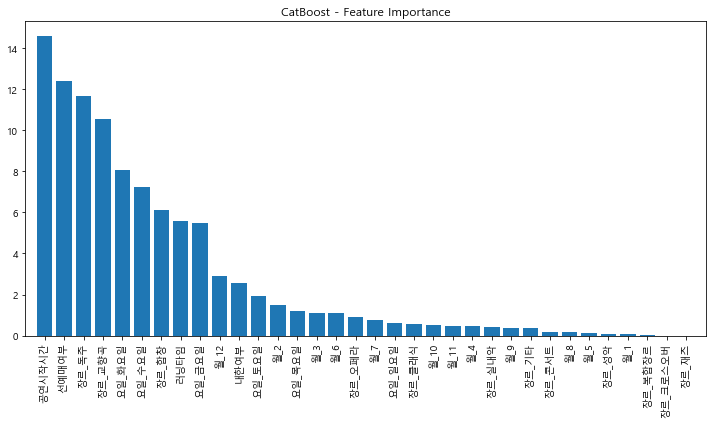

In [48]:
importances = cb.feature_importances_

# 변수 중요도를 내림차순으로 정렬
indices = importances.argsort()[::-1]

# 변수 이름 추출 (여기서 X_train은 학습 데이터의 독립 변수입니다.)
feature_names = train_X.columns

# 변수 중요도 시각화
plt.figure(figsize=(10, 6))
plt.title("CatBoost - Feature Importance")
plt.bar(range(train_X.shape[1]), importances[indices], align="center")
plt.xticks(range(train_X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, train_X.shape[1]])
plt.tight_layout()
plt.show()

In [49]:
explainer = shap.TreeExplainer(cb)
shap_values = explainer.shap_values(test_X)

In [50]:
shap.initjs() # javascript 초기화 (graph 초기화)
shap.force_plot(explainer.expected_value, shap_values[0,:], test_X.iloc[0,:])

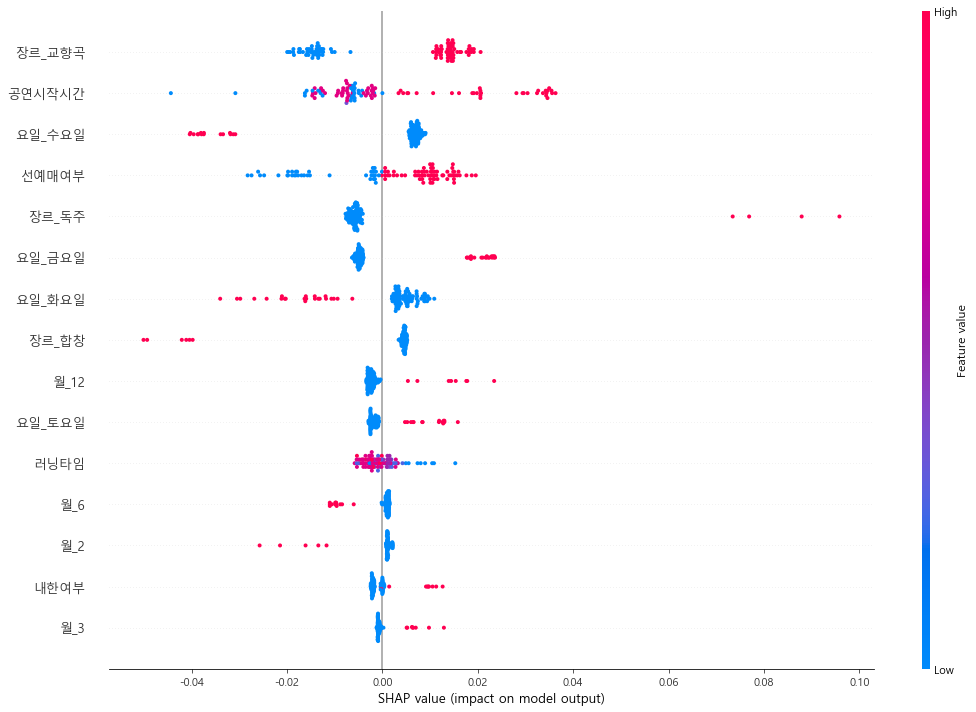

In [51]:
# summary
shap.summary_plot(shap_values, test_X, max_display=15, plot_size=(15,10))

In [52]:
test_X.columns.shape

(34,)

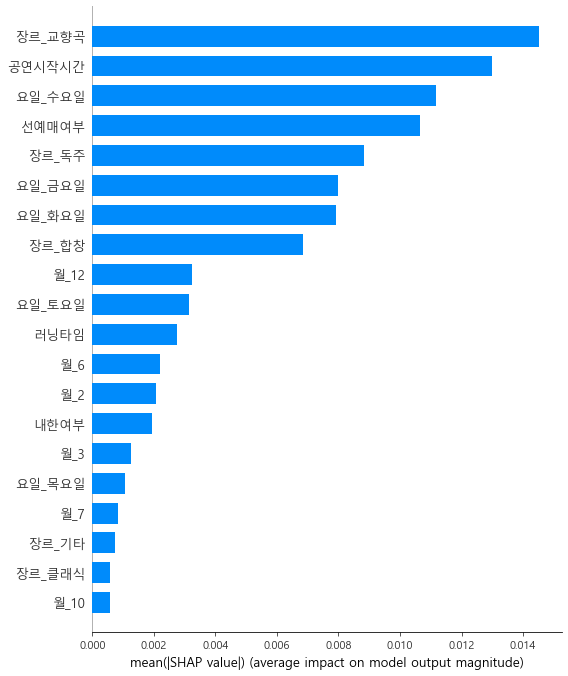

In [53]:
 # 각 변수에 대한 |Shap Values|을 통해 변수 importance 파악
shap.summary_plot(shap_values, test_X, plot_type = "bar")

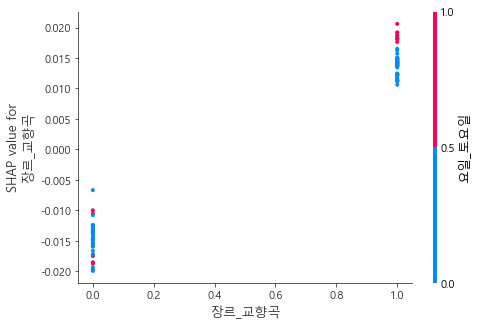

In [54]:
# 변수 간의 shap value 파악
shap.dependence_plot("장르_교향곡", shap_values, test_X)

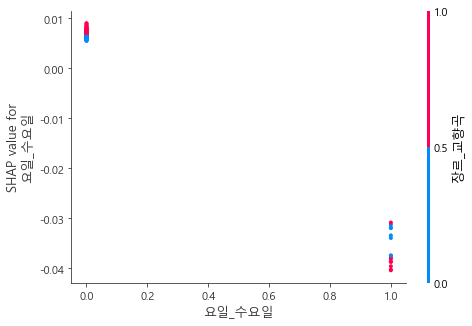

In [62]:
# 변수 간의 shap value 파악
shap.dependence_plot("요일_수요일", shap_values, test_X)

In [56]:
feature_names = train_X.columns

cb_resultX = pd.DataFrame(shap_values, columns = feature_names)

vals = np.abs(cb_resultX.values).mean(0)

shap_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name','feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)
shap_importance

,col_name,feature_importance_vals
4,장르_교향곡,0.01452
0,공연시작시간,0.01299
18,요일_수요일,0.01116
2,선예매여부,0.01066
6,장르_독주,0.00884
16,요일_금요일,0.00800
21,요일_화요일,0.00792
15,장르_합창,0.00686
33,월_12,0.00325
20,요일_토요일,0.00313


### 0.001 cutoff

In [57]:
x_list = shap_importance[shap_importance.feature_importance_vals>=0.001]['col_name'].tolist()

In [58]:
train_cut_X = train_X[x_list]
test_cut_X = test_X[x_list]

In [59]:
train_cut_X.shape

(412, 16)

In [60]:
# Define the CatBoost Regressor model
cb_cut = CatBoostRegressor(random_state=42)

# Define the hyperparameters to tune
param_grid = {'depth': [3, 5, 7, 10, 20],
              'learning_rate': [0.001, 0.01, 0.1, 0.3, 0.5]}

# Define the grid search using the model and hyperparameters
grid_search_cb_cut = GridSearchCV(cb_cut, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search_cb_cut.fit(train_cut_X, train_y_mem)

# Print the best parameters and the best score
print("Best parameters:", grid_search_cb_cut.best_params_)

0:	learn: 0.1337399	total: 551us	remaining: 551ms
1:	learn: 0.1336086	total: 1.57ms	remaining: 782ms
2:	learn: 0.1335106	total: 2.1ms	remaining: 698ms
3:	learn: 0.1334171	total: 2.48ms	remaining: 617ms
4:	learn: 0.1332791	total: 2.95ms	remaining: 587ms
5:	learn: 0.1331666	total: 3.42ms	remaining: 567ms
6:	learn: 0.1330742	total: 3.84ms	remaining: 545ms
7:	learn: 0.1329526	total: 4.32ms	remaining: 535ms
8:	learn: 0.1328621	total: 5.07ms	remaining: 558ms
9:	learn: 0.1327146	total: 5.7ms	remaining: 564ms
10:	learn: 0.1326263	total: 6.42ms	remaining: 578ms
11:	learn: 0.1325386	total: 6.96ms	remaining: 573ms
12:	learn: 0.1324398	total: 7.36ms	remaining: 559ms
13:	learn: 0.1323625	total: 7.82ms	remaining: 551ms
14:	learn: 0.1322517	total: 8.29ms	remaining: 544ms
15:	learn: 0.1321639	total: 8.78ms	remaining: 540ms
16:	learn: 0.1320565	total: 9.29ms	remaining: 537ms
17:	learn: 0.1319985	total: 9.71ms	remaining: 530ms
18:	learn: 0.1319291	total: 10.1ms	remaining: 523ms
19:	learn: 0.1317921	tota

210:	learn: 0.1224551	total: 135ms	remaining: 504ms
211:	learn: 0.1224387	total: 136ms	remaining: 506ms
212:	learn: 0.1224228	total: 137ms	remaining: 506ms
213:	learn: 0.1223953	total: 138ms	remaining: 506ms
214:	learn: 0.1223728	total: 139ms	remaining: 506ms
215:	learn: 0.1223516	total: 139ms	remaining: 506ms
216:	learn: 0.1223180	total: 140ms	remaining: 505ms
217:	learn: 0.1222904	total: 141ms	remaining: 504ms
218:	learn: 0.1222659	total: 141ms	remaining: 503ms
219:	learn: 0.1222405	total: 142ms	remaining: 502ms
220:	learn: 0.1222212	total: 142ms	remaining: 502ms
221:	learn: 0.1221793	total: 143ms	remaining: 501ms
222:	learn: 0.1221512	total: 143ms	remaining: 500ms
223:	learn: 0.1221230	total: 144ms	remaining: 498ms
224:	learn: 0.1221018	total: 144ms	remaining: 498ms
225:	learn: 0.1220738	total: 145ms	remaining: 496ms
226:	learn: 0.1220653	total: 146ms	remaining: 496ms
227:	learn: 0.1220278	total: 147ms	remaining: 497ms
228:	learn: 0.1220041	total: 148ms	remaining: 497ms
229:	learn: 

422:	learn: 0.1181641	total: 272ms	remaining: 370ms
423:	learn: 0.1181506	total: 272ms	remaining: 370ms
424:	learn: 0.1181174	total: 273ms	remaining: 370ms
425:	learn: 0.1181058	total: 274ms	remaining: 369ms
426:	learn: 0.1180992	total: 275ms	remaining: 369ms
427:	learn: 0.1180883	total: 275ms	remaining: 368ms
428:	learn: 0.1180807	total: 276ms	remaining: 367ms
429:	learn: 0.1180515	total: 276ms	remaining: 366ms
430:	learn: 0.1180331	total: 277ms	remaining: 366ms
431:	learn: 0.1180178	total: 278ms	remaining: 365ms
432:	learn: 0.1180053	total: 279ms	remaining: 365ms
433:	learn: 0.1179963	total: 279ms	remaining: 364ms
434:	learn: 0.1179684	total: 280ms	remaining: 364ms
435:	learn: 0.1179502	total: 281ms	remaining: 363ms
436:	learn: 0.1179411	total: 282ms	remaining: 363ms
437:	learn: 0.1179300	total: 282ms	remaining: 362ms
438:	learn: 0.1179208	total: 283ms	remaining: 362ms
439:	learn: 0.1178952	total: 284ms	remaining: 362ms
440:	learn: 0.1178777	total: 285ms	remaining: 361ms
441:	learn: 

629:	learn: 0.1150661	total: 407ms	remaining: 239ms
630:	learn: 0.1150585	total: 408ms	remaining: 238ms
631:	learn: 0.1150464	total: 408ms	remaining: 238ms
632:	learn: 0.1150228	total: 409ms	remaining: 237ms
633:	learn: 0.1150192	total: 410ms	remaining: 236ms
634:	learn: 0.1150017	total: 410ms	remaining: 236ms
635:	learn: 0.1149859	total: 411ms	remaining: 235ms
636:	learn: 0.1149760	total: 411ms	remaining: 234ms
637:	learn: 0.1149581	total: 412ms	remaining: 234ms
638:	learn: 0.1149526	total: 413ms	remaining: 233ms
639:	learn: 0.1149436	total: 413ms	remaining: 233ms
640:	learn: 0.1149363	total: 414ms	remaining: 232ms
641:	learn: 0.1149090	total: 415ms	remaining: 231ms
642:	learn: 0.1148939	total: 415ms	remaining: 231ms
643:	learn: 0.1148852	total: 416ms	remaining: 230ms
644:	learn: 0.1148652	total: 417ms	remaining: 229ms
645:	learn: 0.1148503	total: 417ms	remaining: 229ms
646:	learn: 0.1148353	total: 418ms	remaining: 228ms
647:	learn: 0.1148286	total: 419ms	remaining: 228ms
648:	learn: 

845:	learn: 0.1125639	total: 544ms	remaining: 99ms
846:	learn: 0.1125557	total: 545ms	remaining: 98.4ms
847:	learn: 0.1125539	total: 546ms	remaining: 97.8ms
848:	learn: 0.1125437	total: 546ms	remaining: 97.2ms
849:	learn: 0.1125365	total: 547ms	remaining: 96.5ms
850:	learn: 0.1125347	total: 547ms	remaining: 95.8ms
851:	learn: 0.1125227	total: 548ms	remaining: 95.2ms
852:	learn: 0.1125201	total: 549ms	remaining: 94.6ms
853:	learn: 0.1125144	total: 549ms	remaining: 93.9ms
854:	learn: 0.1125060	total: 550ms	remaining: 93.2ms
855:	learn: 0.1124923	total: 550ms	remaining: 92.6ms
856:	learn: 0.1124729	total: 551ms	remaining: 91.9ms
857:	learn: 0.1124621	total: 551ms	remaining: 91.3ms
858:	learn: 0.1124525	total: 552ms	remaining: 90.6ms
859:	learn: 0.1124473	total: 552ms	remaining: 89.9ms
860:	learn: 0.1124456	total: 553ms	remaining: 89.3ms
861:	learn: 0.1124301	total: 554ms	remaining: 88.6ms
862:	learn: 0.1124278	total: 554ms	remaining: 88ms
863:	learn: 0.1124175	total: 555ms	remaining: 87.3

In [61]:
cb_cut = CatBoostRegressor(depth=3, learning_rate=0.01, random_state=42)
cb_cut.fit(train_cut_X, train_y_mem)

print(f"MSE for CatBoost Cut : {mean_squared_error(test_y_mem, cb_cut.predict(test_cut_X))}")
print(f"MSLE for CatBoost Cut : {mean_squared_log_error(test_y_mem, cb_cut.predict(test_cut_X))}")

0:	learn: 0.1337399	total: 506us	remaining: 506ms
1:	learn: 0.1336086	total: 1.68ms	remaining: 839ms
2:	learn: 0.1335106	total: 2.47ms	remaining: 822ms
3:	learn: 0.1334171	total: 3.16ms	remaining: 786ms
4:	learn: 0.1332791	total: 3.75ms	remaining: 747ms
5:	learn: 0.1331666	total: 4.35ms	remaining: 721ms
6:	learn: 0.1330742	total: 4.92ms	remaining: 698ms
7:	learn: 0.1329526	total: 6.21ms	remaining: 770ms
8:	learn: 0.1328621	total: 7.05ms	remaining: 776ms
9:	learn: 0.1327146	total: 8.1ms	remaining: 802ms
10:	learn: 0.1326263	total: 9ms	remaining: 809ms
11:	learn: 0.1325386	total: 9.98ms	remaining: 821ms
12:	learn: 0.1324398	total: 10.7ms	remaining: 813ms
13:	learn: 0.1323625	total: 11.4ms	remaining: 806ms
14:	learn: 0.1322517	total: 12.1ms	remaining: 795ms
15:	learn: 0.1321639	total: 12.7ms	remaining: 779ms
16:	learn: 0.1320565	total: 13.3ms	remaining: 769ms
17:	learn: 0.1319985	total: 13.9ms	remaining: 760ms
18:	learn: 0.1319291	total: 14.6ms	remaining: 753ms
19:	learn: 0.1317921	total:

186:	learn: 0.1231568	total: 132ms	remaining: 574ms
187:	learn: 0.1231015	total: 133ms	remaining: 574ms
188:	learn: 0.1230672	total: 134ms	remaining: 574ms
189:	learn: 0.1230222	total: 134ms	remaining: 573ms
190:	learn: 0.1229684	total: 135ms	remaining: 572ms
191:	learn: 0.1229383	total: 136ms	remaining: 572ms
192:	learn: 0.1229188	total: 136ms	remaining: 571ms
193:	learn: 0.1228634	total: 137ms	remaining: 570ms
194:	learn: 0.1228412	total: 138ms	remaining: 569ms
195:	learn: 0.1228280	total: 139ms	remaining: 569ms
196:	learn: 0.1228005	total: 140ms	remaining: 569ms
197:	learn: 0.1227881	total: 140ms	remaining: 568ms
198:	learn: 0.1227693	total: 141ms	remaining: 567ms
199:	learn: 0.1227219	total: 142ms	remaining: 567ms
200:	learn: 0.1226966	total: 143ms	remaining: 567ms
201:	learn: 0.1226684	total: 143ms	remaining: 566ms
202:	learn: 0.1226640	total: 144ms	remaining: 564ms
203:	learn: 0.1226405	total: 144ms	remaining: 563ms
204:	learn: 0.1226035	total: 145ms	remaining: 562ms
205:	learn: 

412:	learn: 0.1183098	total: 267ms	remaining: 379ms
413:	learn: 0.1182964	total: 267ms	remaining: 378ms
414:	learn: 0.1182847	total: 268ms	remaining: 377ms
415:	learn: 0.1182724	total: 268ms	remaining: 377ms
416:	learn: 0.1182498	total: 269ms	remaining: 376ms
417:	learn: 0.1182473	total: 269ms	remaining: 375ms
418:	learn: 0.1182373	total: 270ms	remaining: 374ms
419:	learn: 0.1182272	total: 270ms	remaining: 374ms
420:	learn: 0.1182139	total: 271ms	remaining: 373ms
421:	learn: 0.1181869	total: 272ms	remaining: 372ms
422:	learn: 0.1181641	total: 272ms	remaining: 371ms
423:	learn: 0.1181506	total: 273ms	remaining: 371ms
424:	learn: 0.1181174	total: 273ms	remaining: 370ms
425:	learn: 0.1181058	total: 274ms	remaining: 369ms
426:	learn: 0.1180992	total: 275ms	remaining: 369ms
427:	learn: 0.1180883	total: 275ms	remaining: 368ms
428:	learn: 0.1180807	total: 276ms	remaining: 367ms
429:	learn: 0.1180515	total: 276ms	remaining: 366ms
430:	learn: 0.1180331	total: 277ms	remaining: 366ms
431:	learn: 

638:	learn: 0.1149526	total: 401ms	remaining: 227ms
639:	learn: 0.1149436	total: 402ms	remaining: 226ms
640:	learn: 0.1149363	total: 402ms	remaining: 225ms
641:	learn: 0.1149090	total: 403ms	remaining: 225ms
642:	learn: 0.1148939	total: 404ms	remaining: 224ms
643:	learn: 0.1148852	total: 405ms	remaining: 224ms
644:	learn: 0.1148652	total: 405ms	remaining: 223ms
645:	learn: 0.1148503	total: 406ms	remaining: 222ms
646:	learn: 0.1148353	total: 407ms	remaining: 222ms
647:	learn: 0.1148286	total: 407ms	remaining: 221ms
648:	learn: 0.1148077	total: 408ms	remaining: 220ms
649:	learn: 0.1148041	total: 408ms	remaining: 220ms
650:	learn: 0.1147924	total: 409ms	remaining: 219ms
651:	learn: 0.1147669	total: 409ms	remaining: 218ms
652:	learn: 0.1147509	total: 410ms	remaining: 218ms
653:	learn: 0.1147198	total: 410ms	remaining: 217ms
654:	learn: 0.1147167	total: 411ms	remaining: 216ms
655:	learn: 0.1147007	total: 411ms	remaining: 216ms
656:	learn: 0.1146965	total: 412ms	remaining: 215ms
657:	learn: 

881:	learn: 0.1122652	total: 538ms	remaining: 72ms
882:	learn: 0.1122628	total: 539ms	remaining: 71.4ms
883:	learn: 0.1122612	total: 540ms	remaining: 70.8ms
884:	learn: 0.1122599	total: 540ms	remaining: 70.2ms
885:	learn: 0.1122449	total: 541ms	remaining: 69.6ms
886:	learn: 0.1122422	total: 542ms	remaining: 69ms
887:	learn: 0.1122410	total: 542ms	remaining: 68.4ms
888:	learn: 0.1122311	total: 543ms	remaining: 67.8ms
889:	learn: 0.1122284	total: 543ms	remaining: 67.1ms
890:	learn: 0.1122210	total: 544ms	remaining: 66.5ms
891:	learn: 0.1122074	total: 544ms	remaining: 65.9ms
892:	learn: 0.1121977	total: 545ms	remaining: 65.3ms
893:	learn: 0.1121829	total: 545ms	remaining: 64.6ms
894:	learn: 0.1121813	total: 546ms	remaining: 64ms
895:	learn: 0.1121801	total: 546ms	remaining: 63.4ms
896:	learn: 0.1121640	total: 547ms	remaining: 62.8ms
897:	learn: 0.1121586	total: 547ms	remaining: 62.1ms
898:	learn: 0.1121403	total: 548ms	remaining: 61.5ms
899:	learn: 0.1121269	total: 548ms	remaining: 60.9ms